In [1]:
import datarobot as dr
dr.Client(token='NjBmMDJiZTU4NmUxYmI5YmM1Y2NlOTExOkNSV0ppZlZYVjNIbGZFcnlyTlMrUWYxQlV2MVBiSmEvMi9hSjUwQnpVdzA9',
          endpoint='https://app2.datarobot.com/api/v2')

In [40]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('archive/NKE_2006-01-01_to_2018-01-01.csv')
dataset

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
1,2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2,2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
3,2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
4,2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE
...,...,...,...,...,...,...,...
3015,2017-12-22,61.20,63.54,60.13,63.29,20414195,NKE
3016,2017-12-26,62.90,63.89,62.81,63.65,4563475,NKE
3017,2017-12-27,63.56,63.60,62.77,62.95,8959745,NKE
3018,2017-12-28,63.00,63.32,62.85,62.95,3987151,NKE


Make new project

In [3]:
project = dr.Project.start('archive/NKE_2006-01-01_to_2018-01-01.csv',
                           project_name='datarobot-pred',
                           target="Close")

In [4]:
project.get_model_jobs()

[ModelJob(Linear Regression, status=inprogress),
 ModelJob(Ridge Regressor, status=inprogress),
 ModelJob(Auto-tuned K-Nearest Neighbors Regressor (Euclidean Distance), status=queue),
 ModelJob(Mean Response Regressor, status=queue),
 ModelJob(RuleFit Regressor, status=queue),
 ModelJob(Ridge Regressor, status=queue),
 ModelJob(eXtreme Gradient Boosted Trees Regressor, status=queue),
 ModelJob(Ridge Regressor, status=queue),
 ModelJob(Elastic-Net Regressor (mixing alpha=0.5 / Least-Squares Loss), status=queue),
 ModelJob(RandomForest Regressor, status=queue),
 ModelJob(Generalized Additive2 Model, status=queue),
 ModelJob(Light Gradient Boosted Trees Regressor with Early Stopping, status=queue),
 ModelJob(Light Gradient Boosting on ElasticNet Predictions , status=queue),
 ModelJob(Ridge Regressor, status=queue),
 ModelJob(Elastic-Net Regressor (mixing alpha=0.5 / Least-Squares Loss), status=queue),
 ModelJob(Ridge Regressor with Binned numeric features, status=queue),
 ModelJob(RandomF

In [6]:
models = project.get_models()
example_model = models[0]

In [34]:
example_model.download_export('download-model.pkl')

ClientError: 404 client error: {'message': 'This resource does not exist.'}

In [8]:
testset = pd.read_csv('archive/NKE_2006-01-01_to_2018-01-01_test.csv')

In [25]:
testset

,Date,Open,High,Low,Volume,Name
0,2017-12-30,63.260,63.085,62.57,4933953.0,NKE
1,2017-12-31,63.297,62.901,62.50,4634285.6,NKE
2,2018-01-01,63.334,62.717,62.43,4334618.2,NKE
3,2018-01-02,63.371,62.533,62.36,4034950.8,NKE
4,2018-01-03,63.408,62.349,62.29,3735283.4,NKE
5,2018-01-04,63.445,62.165,62.22,3435616.0,NKE
6,2018-01-05,63.482,61.981,62.15,3135948.6,NKE


In [21]:
test_data = project.upload_dataset(testset)

In [22]:
predict_job = example_model.request_predictions(test_data.id)

In [23]:
predictions = predict_job.get_result_when_complete()

In [24]:
predictions

,row_id,prediction
0,0,63.276851
1,1,62.607539
2,2,54.950073
3,3,55.228338
4,4,54.247297
5,5,53.998874
6,6,55.283776


In [37]:
example_model.get_all_residuals_charts()

[ResidualChart(holdout), ResidualChart(validation)]

Text(0.5, 1.04, 'Predicted Values vs. Actual Values')

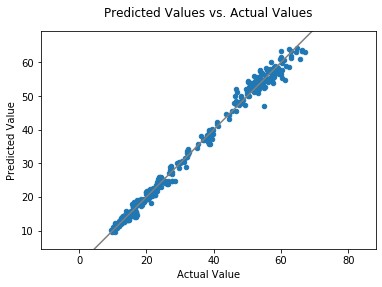

In [42]:
import matplotlib.pyplot as plt

validation = example_model.get_all_residuals_charts()[1]

actual, predicted, residual, rows = zip(*validation.data)
data = {'actual': actual, 'predicted': predicted}
data_frame = pd.DataFrame(data)

plot = data_frame.plot.scatter(
    x='actual',
    y='predicted',
    legend=False,
)

# define our axes with a minuscule bit of padding
min_x = min(data['actual']) - 5
max_x = max(data['actual']) + 5
min_y = min(data['predicted']) - 5
max_y = max(data['predicted']) + 5

biggest_value = max(abs(i) for i in [min_x, max_x, min_y, max_y])

# plot a diagonal 1:1 line to show the "perfect fit" case
diagonal = np.linspace(-biggest_value, biggest_value, 100)
plt.plot(diagonal, diagonal, color='gray')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.axis('equal')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

plt.title('Predicted Values vs. Actual Values', y=1.04)

Using the deployed models

In [27]:
deployments = dr.Deployment.list()

In [43]:
deployments

[Deployment(Recommended model for 중식계 on train.csv),
 Deployment(Close Predictions),
 Deployment(Close Predictions)]

In [44]:
deployments[0].request_predictions(test_data.id)

AttributeError: 'Deployment' object has no attribute 'request_predictions'